<a href="https://colab.research.google.com/github/MariaGodoi/cn1t2/blob/main/Quest%C3%A3o4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



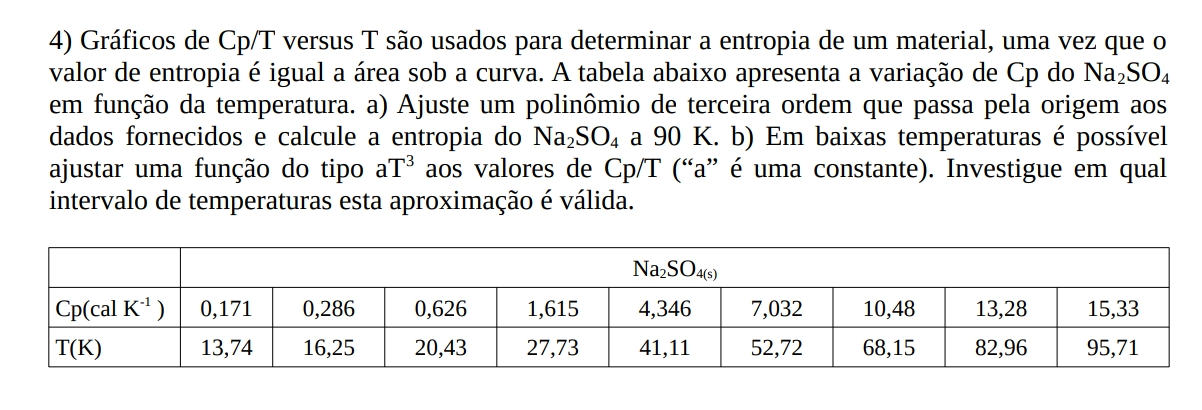



In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import curve_fit

# Dados fornecidos
T = np.array([13.74, 16.25, 20.43, 27.73, 41.11, 52.72, 68.15, 82.96, 95.71])  # K
Cp = np.array([0.171, 0.286, 0.626, 1.615, 4.346, 7.032, 10.48, 13.28, 15.33])  # cal/K

# Cp/T
Cp_T = Cp / T

# Ajuste polinomial de 3ª ordem passando pela origem
def poly_3rd(x, a, b, c):
    return a*x + b*x**2 + c*x**3

    # CORREÇÃO: Removida indentação excessiva
    params, _ = curve_fit(poly_3rd, T, Cp_T)
    a, b, c = params

    # Função ajustada
    def f(T):
        return poly_3rd(T, a, b, c)

        # CORREÇÃO: Removida indentação excessiva
        # Entropia até 90 K
        S_90K, _ = integrate.quad(f, 0, 90)

        print("Parâmetros do polinômio de 3ª ordem:")
        print(f"a = {a:.6e}, b = {b:.6e}, c = {c:.6e}")
        print(f"Entropia do Na₂SO₄ a 90 K = {S_90K:.4f} cal/K")

        # Lei cúbica Cp/T = aT³ em baixas T
        def cubic(T, a):
            return a*T**3

            # CORREÇÃO: Removida indentação excessiva
            params_cubic, _ = curve_fit(cubic, T[:3], Cp_T[:3])  # usando 3 primeiros pontos
            a_cubic = params_cubic[0]

            print(f"Aproximação Cp/T = aT³ em baixas T, a = {a_cubic:.6e}")

            # Gráfico Cp/T vs T com ajuste polinomial
            T_plot = np.linspace(0, 100, 500)

            plt.figure(figsize=(10,4))

            plt.subplot(1,2,1)
            plt.plot(T, Cp_T, 'o', label='Dados experimentais')
            plt.plot(T_plot, f(T_plot), '-', label='Ajuste polinomial')
            plt.xlabel("T (K)")
            plt.ylabel("Cp/T (cal K$^{-2}$)")
            plt.title("Ajuste polinomial de 3ª ordem")
            plt.legend()
            plt.grid(True)

            # Gráfico Cp/T vs T com aproximação cúbica
            plt.subplot(1,2,2)
            plt.plot(T, Cp_T, 'o', label='Dados experimentais')
            plt.plot(T, cubic(T, a_cubic), '--', label='Lei cúbica')
            plt.xlabel("T (K)")
            plt.ylabel("Cp/T (cal K$^{-2}$)")
            plt.title("Aproximação Cp/T = aT³")
            plt.legend()
            plt.grid(True)

            plt.tight_layout()
            plt.show()